Jimmy Williams

In [7]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pl
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'number of molecules')

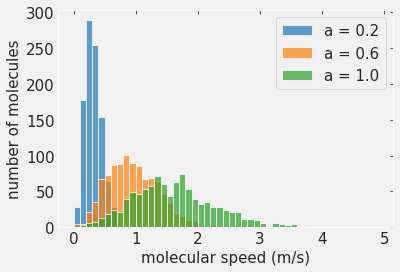

In [8]:
np.random.randn(123)
fig, ax = pl.subplots()
for a in [0.2, 0.6, 1.0]:
    ax.hist(sp.stats.chi.rvs(df=3, scale=a, size=1000), # could as well be sp.stats.maxwell.rvs(scale=a, size=1000)
          bins=np.arange(0,5,0.1), alpha=0.7,
       label="a = %.1f"%a);

pl.legend();

plt.xlabel('molecular speed (m/s)')
plt.ylabel('number of molecules')

the correct answer is that the a value correlates to the square root of T.  T to the 1/2 power is equal to the square root of T, meaning that as T (or a) increases, so should the speed of the gas atoms.

In [0]:
(sqrt(2)*((sp.special.gamma((4)/2))/(sp.special.gamma(3/2))))*.2

0.3191538243211462

In [0]:
(sqrt(2)*((sp.special.gamma((4)/2))/(sp.special.gamma(3/2))))*.6

0.9574614729634384

In [0]:
(sqrt(2)*((sp.special.gamma((4)/2))/(sp.special.gamma(3/2))))*1

1.5957691216057308

The mean of each of our corresponding a values is almost exactly the same as the most probable molecular speed for that a value. Together their mean is representative of the middle data set.



Assignment 2

In [5]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, 'x')

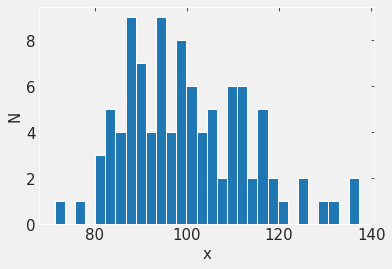

In [10]:
distributions = ['chisq']
mymean = 100
df = mymean
md['chisq'] = np.random.chisquare(mymean, size = 100)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 1.1: Chi squared distribution of a sample size 100 with 100 degrees of freedom

In [12]:
print("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


In [0]:
import numpy as np
np.random.seed(456)
md = {}

In [14]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

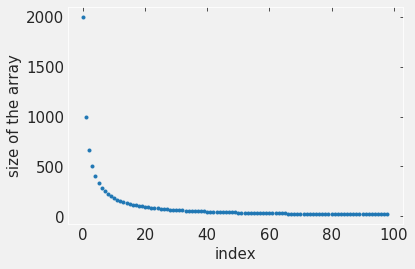

In [15]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 1.2: Chi squared distribution of 100 sample sizes

Text(1259.3999999999999, 100, 'expected mean')

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


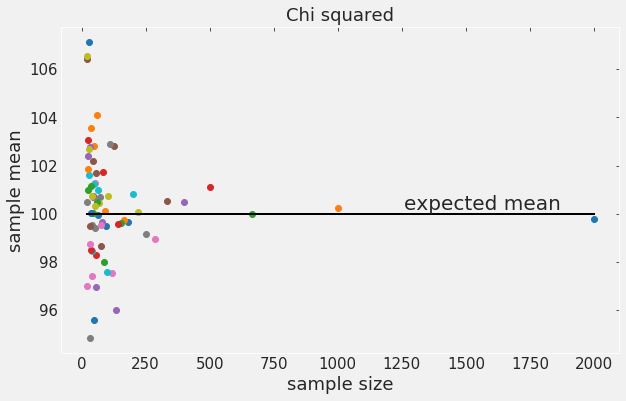

In [16]:
md['chisq'] = {} 


for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
       

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 1.3: Chi squared sitribution of sample size as a function of sample mean (expected sample mean).
This figure is representative of the law of large numbers as the more samples are taken the closer their total means approaches to the population mean. 

Text(0, 0.5, 'N')

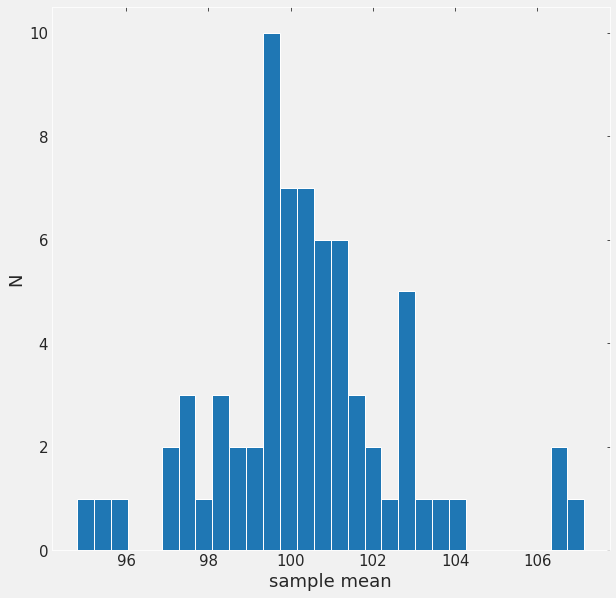

In [17]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 1.4: Sample means for 100 Chi squared distributions

Text(0.5, 0, 'x')

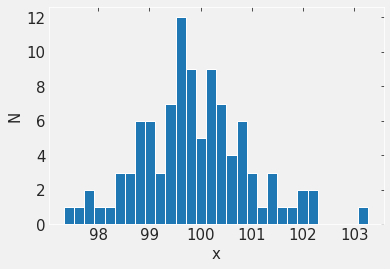

In [18]:
distributions = ['lnorm']
mymean = 100
md['lnorm'] = np.random.normal(mymean, 1, size = 100)
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 2.1: Normal distribution of a sample with size 100

In [19]:
print("normal mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

normal mean: 99.88, standard deviation: 1.06


In [20]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

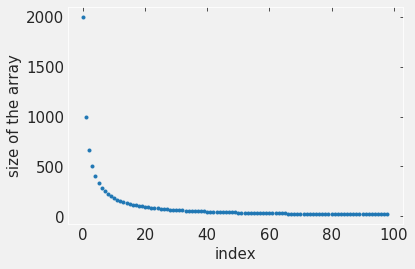

In [21]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Fig 2.2: normal distribution of 100 sample sizes

Text(1259.3999999999999, 100, 'expected mean')

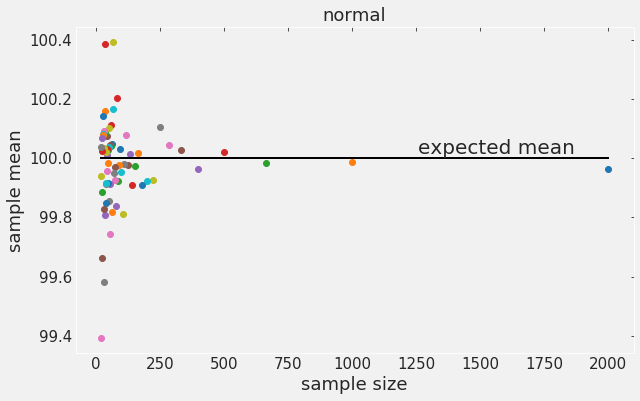

In [22]:
md['lnorm'] = {} 


for n in mysize:
    md['lnorm'][n] = np.random.normal(df, size = n)
       

md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('normal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axlnorm_mu_n.text(axlnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 2.3: Normal distribution of a sample size as a functon of sample mean.
This figure is representative of the law of large numbers as the more samples are taken the closer their total means approaches to the population mean. 

Text(0, 0.5, 'N')

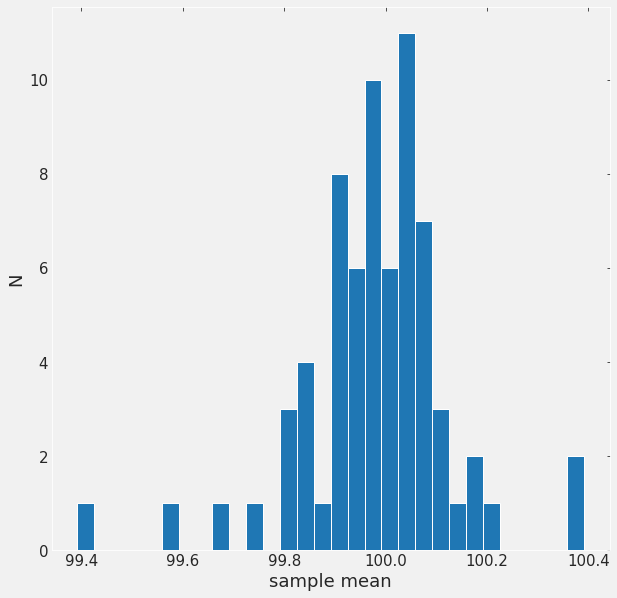

In [23]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 2.4:sample means for 100 normal distributions

Text(0.5, 0, 'x')

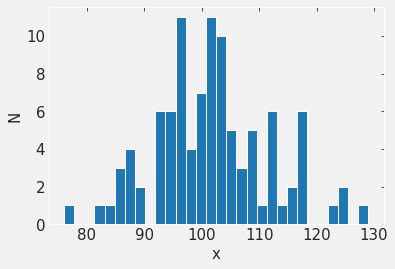

In [24]:
distributions = ['pois']
mymean = 100
lam = mymean
md['pois'] = np.random.poisson(lam, size=100)
pl.hist(md['pois'],bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 3.1: Poisson distribution with 100 degrees of freedom

In [25]:
print("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 101.78, standard deviation: 9.90


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

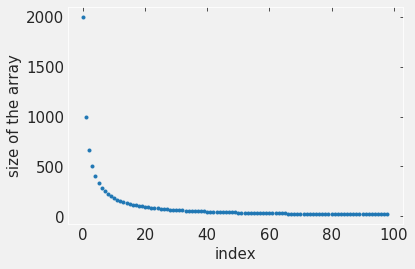

In [26]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 3.2: Poisson distribution of 100 different sample sizes

Text(1259.3999999999999, 100, 'expected mean')

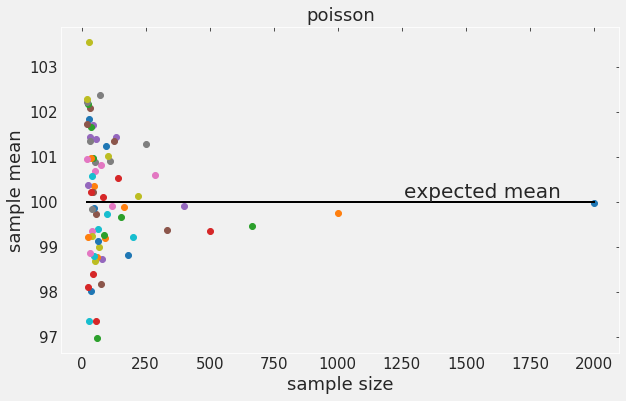

In [27]:
md['pois'] = {} 


for n in mysize:
    md['pois'][n] = np.random.poisson(lam, size = n)
       

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 3.3: Poisson distribution of sample size as a function of sample mean.
This figure is representative of the law of large numbers as the more samples are taken the closer their total means approaches to the population mean. 

Text(0, 0.5, 'N')

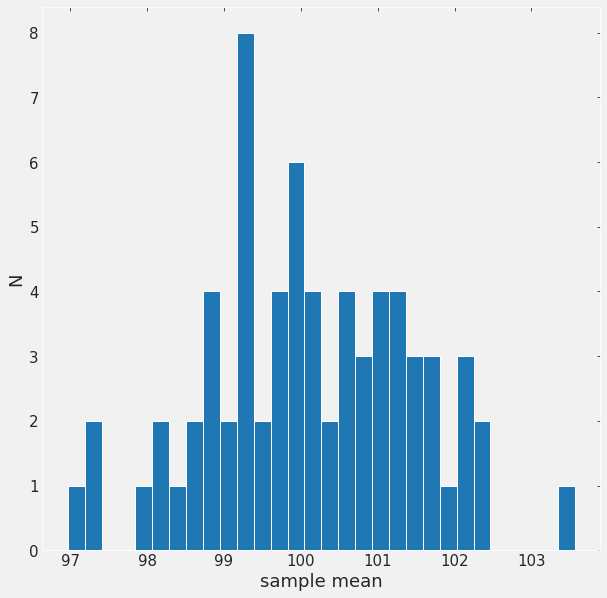

In [28]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

figure 3.4: sample means for 100 poisson distributions

Text(0.5, 0, 'x')

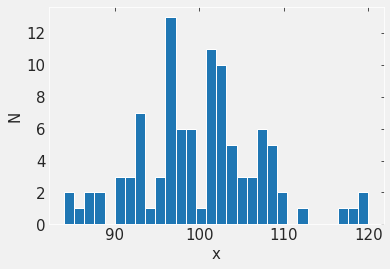

In [29]:
distributions = ['binomial']
mymean = 100
md['binomial'] = np.random.binomial(200, .5, size=100)
pl.hist(md['binomial'],bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 4.1: binomial distribution with 100 degrees freedom

In [30]:
print("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.97, standard deviation: 7.15


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

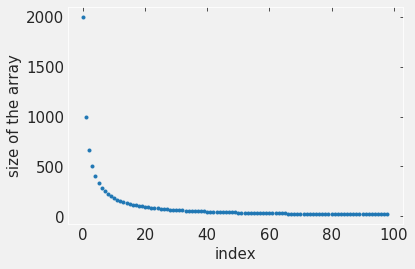

In [31]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 4.2: Binomial distribution of 100 different sample sizes

Text(1259.3999999999999, 100, 'expected mean')

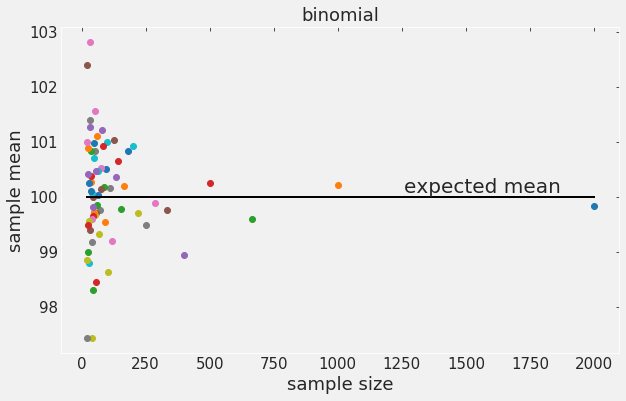

In [32]:
md['binomial'] = {} 


for n in mysize:
    md['binomial'][n] = np.random.binomial(200, .5, size = n)
       

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axbinomial_mu_n.text(axbinomial_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

Figure 4.3: Binomial distribution of sample size as a function of sample mean.
This figure is representative of the law of large numbers as the more samples are taken the closer their total means approaches to the population mean. 

Text(0, 0.5, 'N')

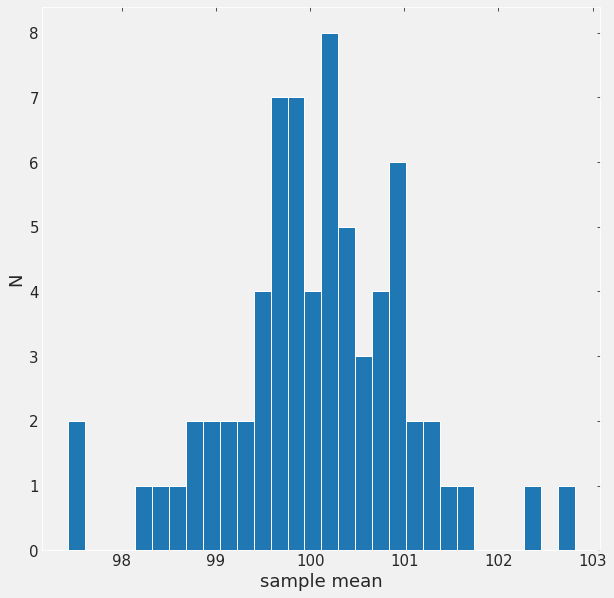

In [33]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 4.4: Sample means for 100 binomial distributions

Text(0.5, 0, 'x')

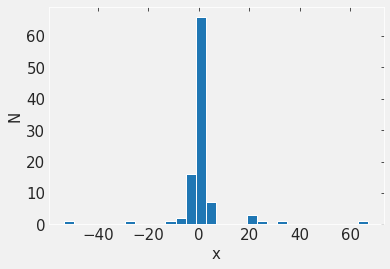

In [34]:
distributions = ['cauchy']
mymean = 0
md['cauchy'] = np.random.standard_cauchy(size=100)
pl.hist(md['cauchy'],bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 5.1: cauchy distribution with 100 degrees freedom

In [35]:
print("Cauchy mean: %.2f, standard deviation: %.2f"%(md['cauchy'].mean(), md['cauchy'].std()))

Cauchy mean: 0.92, standard deviation: 10.72


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

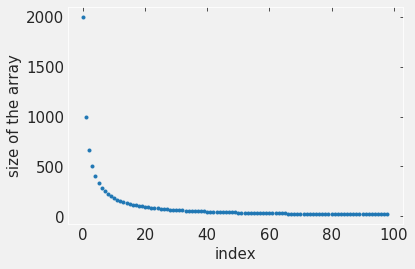

In [36]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

Figure 5.2: cauchy distribution of 100 different sample sizes

Text(1259.3999999999999, 0, 'expected mean')

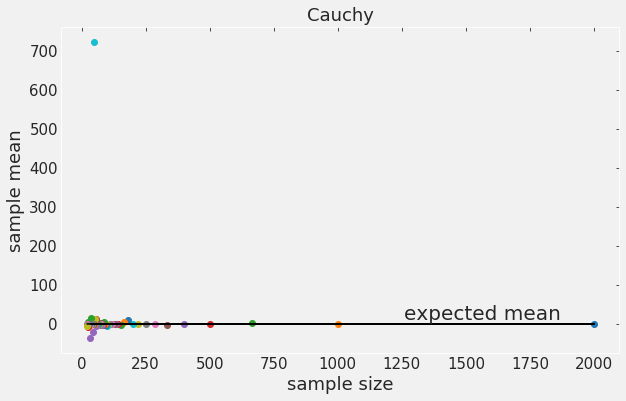

In [37]:
md['cauchy'] = {} 


for n in mysize:
    md['cauchy'][n] = np.random.standard_cauchy(size = n)
       

md['cauchy']['means'] = {}
axcauchy_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['cauchy']:
    if not type(nn) == str:
        md['cauchy']['means'][nn] = md['cauchy'][nn].mean()
        axcauchy_mu_n.plot(nn, md['cauchy']['means'][nn], 'o')
        axcauchy_mu_n.set_xlabel('sample size', fontsize=18)
        axcauchy_mu_n.set_ylabel('sample mean', fontsize=18)
        axcauchy_mu_n.set_title('Cauchy', fontsize=18)
        axcauchy_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axcauchy_mu_n.text(axcauchy_mu_n.get_xlim()[1] * .6, 0, "expected mean", 
                  va="bottom", fontsize=20)

Figure 5.3: Cauchy distribution of sample size as a function of sample mean.
This figure is representative of the law of large numbers as the more samples are taken the closer their total means approaches to the population mean. 

Text(0, 0.5, 'N')

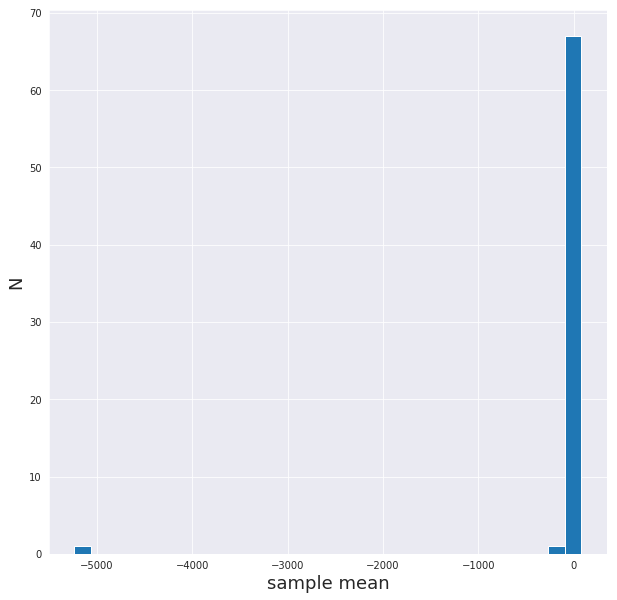

In [51]:
allmeans = list(md['cauchy']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 5.4: sample means for 100 cauchy distributions